<a href="https://colab.research.google.com/github/shinobu9/Seminars-in-econometrics/blob/main/sem_6_22_03_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
#import pmdarima as pm

import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# для белого шума
np.random.seed(12345)
wn = np.random.standard_normal(201)

nsimulations = 200
empty_dataset = np.zeros(nsimulations)
np.random.seed(12345)

measurement_shocks = np.zeros(nsimulations)

### Задание 17 Поведение реализаций стационарных и нестационарных временных рядов

Какие из приведенных ниже моделей временных рядов являются нестационарными и почему? Смоделируйте реализации этих моделей. Соответствует ли поведение смоделированных реализаций теоретическому разделению указанных моделей на стационарные и нестационарные?

$X_t = 0.08 t + ε_t ,   $

$Y_t = 1.8 Y_{t –1} – 0.8 Y_{t –2} + ε_t , $    

$Z_t = 0.3 Z_{t –1} + 0.4 Z_{t –2} + ε_t , $

In [ ]:
np.random.seed(12345)
mod = sm.tsa.SARIMAX(empty_dataset, order=(0, 0, 0), trend='t')
ts_1 = mod.simulate([0.08, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

In [ ]:
np.random.seed(12345)
mod = sm.tsa.SARIMAX(empty_dataset, order=(1, 1, 0), trend='n')
ts_2 = mod.simulate([-0.8, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:], initial_state = [0, 0])

In [ ]:
np.random.seed(12345)
mod = sm.tsa.SARIMAX(empty_dataset, order=(2, 0, 0), trend='n')
ts_3 = mod.simulate([0.3, 0.4, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

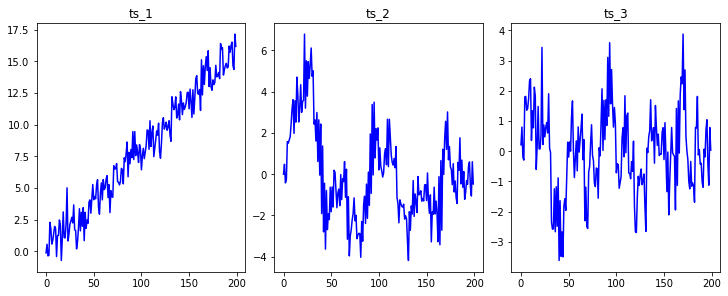

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 4), constrained_layout=True)

ax1.set(title='ts_1')
ax1.plot(ts_1,'b-')

ax2.set(title='ts_2')
ax2.plot(ts_2,'b-')

ax3.set(title='ts_3')
ax3.plot(ts_3,'b-')

plt.show()

### Задание 18 Поведение коррелограмм, построенных по реализациям стационарных и нестационарных процессов

Постройте выборочные коррелограммы смоделированных реализаций, полученных в задаче 17. 

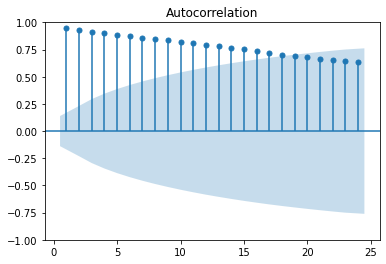

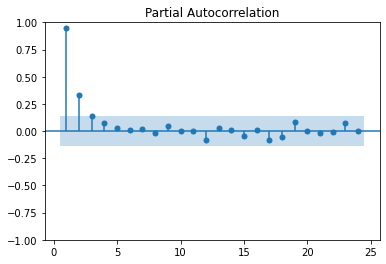

In [ ]:
sm.graphics.tsa.plot_acf(ts_1, zero = False)
sm.graphics.tsa.plot_pacf(ts_1, method = 'ywm', zero = False)
plt.show()

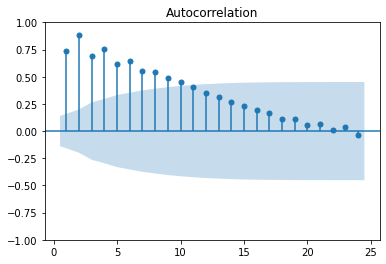

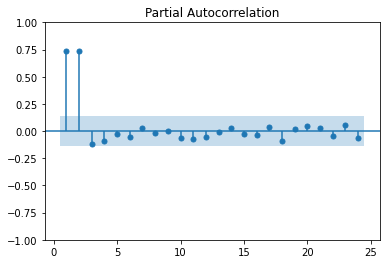

In [ ]:
sm.graphics.tsa.plot_acf(ts_2, zero = False)
sm.graphics.tsa.plot_pacf(ts_2, method = 'ywm', zero = False)
plt.show()

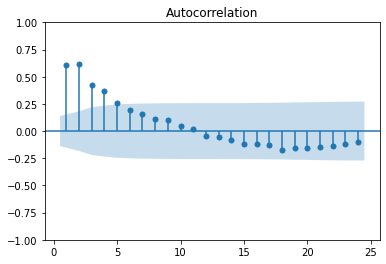

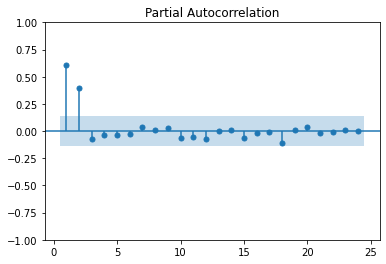

In [ ]:
sm.graphics.tsa.plot_acf(ts_3, zero = False)
sm.graphics.tsa.plot_pacf(ts_3, method = 'ywm', zero = False)
plt.show()

### Задание 19 Поведение реализаций процесса авторегрессии первого порядка при различных значениях коэффициента при запаздывающей переменной

Смоделируйте реализации процесса AR(1) 

$X_t = a_1 X_{t –1} + ε_t  ,  t = 1, 2,  … , 50,  X_0 = 0,$

при  a_1 = 0.5,  a_1 = 0.7,  a_1 = 0.9

Проследите, как изменяется характер траектории ряда c возрастанием значений коэффициента  a1 от  a1 = 0.5 до a1 = 1.1.

In [ ]:
a_1 = [0.5, 0.7, 0.9]
ts = []

for a in a_1:
    
    if a < 1:
        np.random.seed(12345)
        mod = sm.tsa.SARIMAX(empty_dataset, order=(1, 0, 0), trend='n')
        ts.append(mod.simulate([a, 1**2], nsimulations = nsimulations, 
                        measurement_shocks = measurement_shocks, state_shocks = wn[1:]))
    else:
        np.random.seed(12345)
        mod = sm.tsa.SARIMAX(empty_dataset, order=(1, 1, 0), trend='n')
        ts.append(mod.simulate([a-1, 1**2], nsimulations = nsimulations, 
                        measurement_shocks = measurement_shocks, state_shocks = wn[1:], initial_state = [0, 0]))

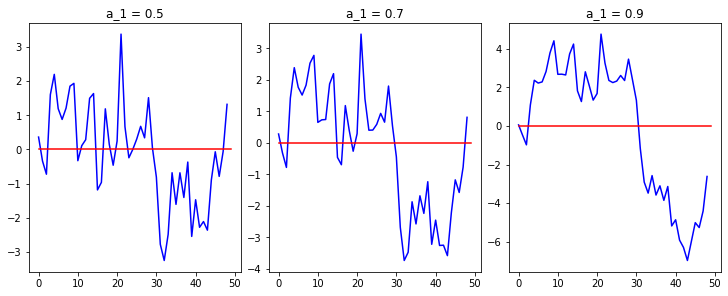

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 4), constrained_layout=True)

i=0

for col in ax:
       col.set(title='a_1 = ' + str(a_1[i]))
       col.plot(ts[i][1:50], 'b-')
       col.plot(np.zeros(50), 'r-')
       i += 1 

plt.show()

### Задача 20.    Поведение коррелограмм, построенных по реализациям процесса авторегрессии первого порядка при различных значениях коэффициента при запаздывающей переменной

Проанализируйте изменение характера коррелограмм, построенных по реализациям процесса авторегрессии первого порядка при возрастании значений коэффициента   a1  от    a1 = 0.5   до a1 = 1.1.

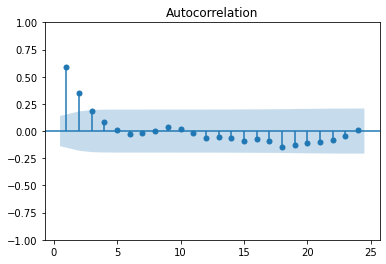

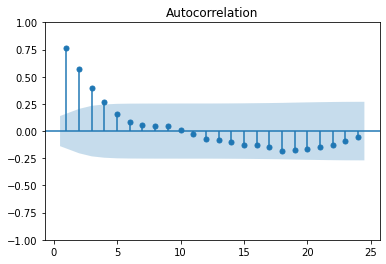

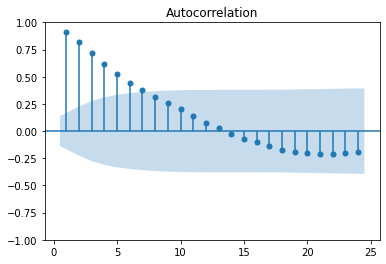

In [ ]:
for item in ts:
    sm.graphics.tsa.plot_acf(item, zero = False)

### Задача 21. Процесс случайного блуждания как модель стохастического тренда

Смоделируйте реализацию процесса случайного блуждания

$ X_t = X_{t –1} + ε_t ,  t = 1, 2, … , 500,  X_0 = 0.$

Почему о процессе случайного блуждания говорят, как о модели стохастического тренда? Поясните это на примере смоделированной реализации.

In [ ]:
np.random.seed(12345)
mod = sm.tsa.SARIMAX(empty_dataset, order=(0, 1, 0), trend='n')
rw = (mod.simulate([1, 1**2], nsimulations = nsimulations, 
        measurement_shocks = measurement_shocks, state_shocks = wn[1:], initial_state = [0, 0]))

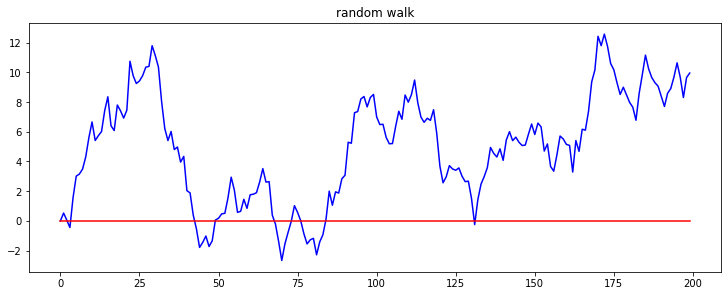

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 4), constrained_layout=True)

ax.set(title='random walk')
ax.plot(rw,'b-')
ax.plot(np.zeros(len(rw)), 'r-')

plt.show()

### Задача 22.    Фундаментальное различие между временными рядами, имеющими только детерминированный тренд, и рядами, которые (возможно, наряду с детерминированным) имеют стохастический тренд

Постройте реализации процессов:

$ X_t = 0.05t + ε_t ,  t = 1, 2,  … , 100,  X_0 = 0$  (процесс с детерминированным трендом),

$ W_t = 0.05 + W_{t –1} + ε_t,  t = 1, 2, … , 100, W_0 = 0$  (процесс  со стохастическим и детерминированным трендами – случайное блуждание со сносом), 

используя одну и ту же имитацию процесса белого шума. 

Обратите внимание на поведение построенных реализаций. Как ведут себя построенные реализации относительно детерминированного тренда?

In [ ]:
np.random.seed(12345)
mod = sm.tsa.SARIMAX(empty_dataset, order=(0, 0, 0), trend='t')
trnd = mod.simulate([0.05, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:])

In [ ]:
np.random.seed(12345)
mod = sm.tsa.SARIMAX(empty_dataset, order=(0, 1, 0), trend='c')
rw = mod.simulate([0.05, 1**2], nsimulations = nsimulations, 
                    measurement_shocks = measurement_shocks, state_shocks = wn[1:], initial_state = [0, 0])

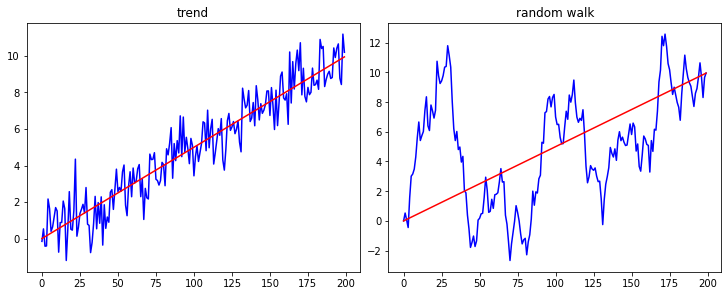

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4), constrained_layout=True)

ax1.set(title='trend')
ax1.plot(trnd,'b-')
ax1.plot(0.05 * np.arange(len(trnd)), 'r')

ax2.set(title='random walk')
ax2.plot(rw,'b-')
ax2.plot(0.05 * np.arange(len(rw)), 'r')

plt.show()

### Задача 23.     Последствия неправильного выбора метода очистки ряда от тренда (ложная периодичность, эффект Слуцкого, необратимость MA составляющей)

Для построенных реализаций процессов  Xt   и  Wt
произведите очистку от тренда, оценивая регрессию переменных  Xt   и Wt  на константу и переменную  t  и получая ряды остатков  x_res, w_res

In [ ]:
mod_trnd = sm.tsa.statespace.SARIMAX(trnd, trend='ct', order=(0,0,0))
res_trnd = mod_trnd.fit(disp = False)
print(res_trnd.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                        SARIMAX   Log Likelihood                -284.137
Date:                Wed, 29 Mar 2023   AIC                            574.275
Time:                        11:11:38   BIC                            584.170
Sample:                             0   HQIC                           578.279
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0031      0.133     -0.024      0.981      -0.265       0.258
drift          0.0500      0.001     41.833      0.000       0.048       0.052
sigma2         1.0039      0.104      9.671      0.0

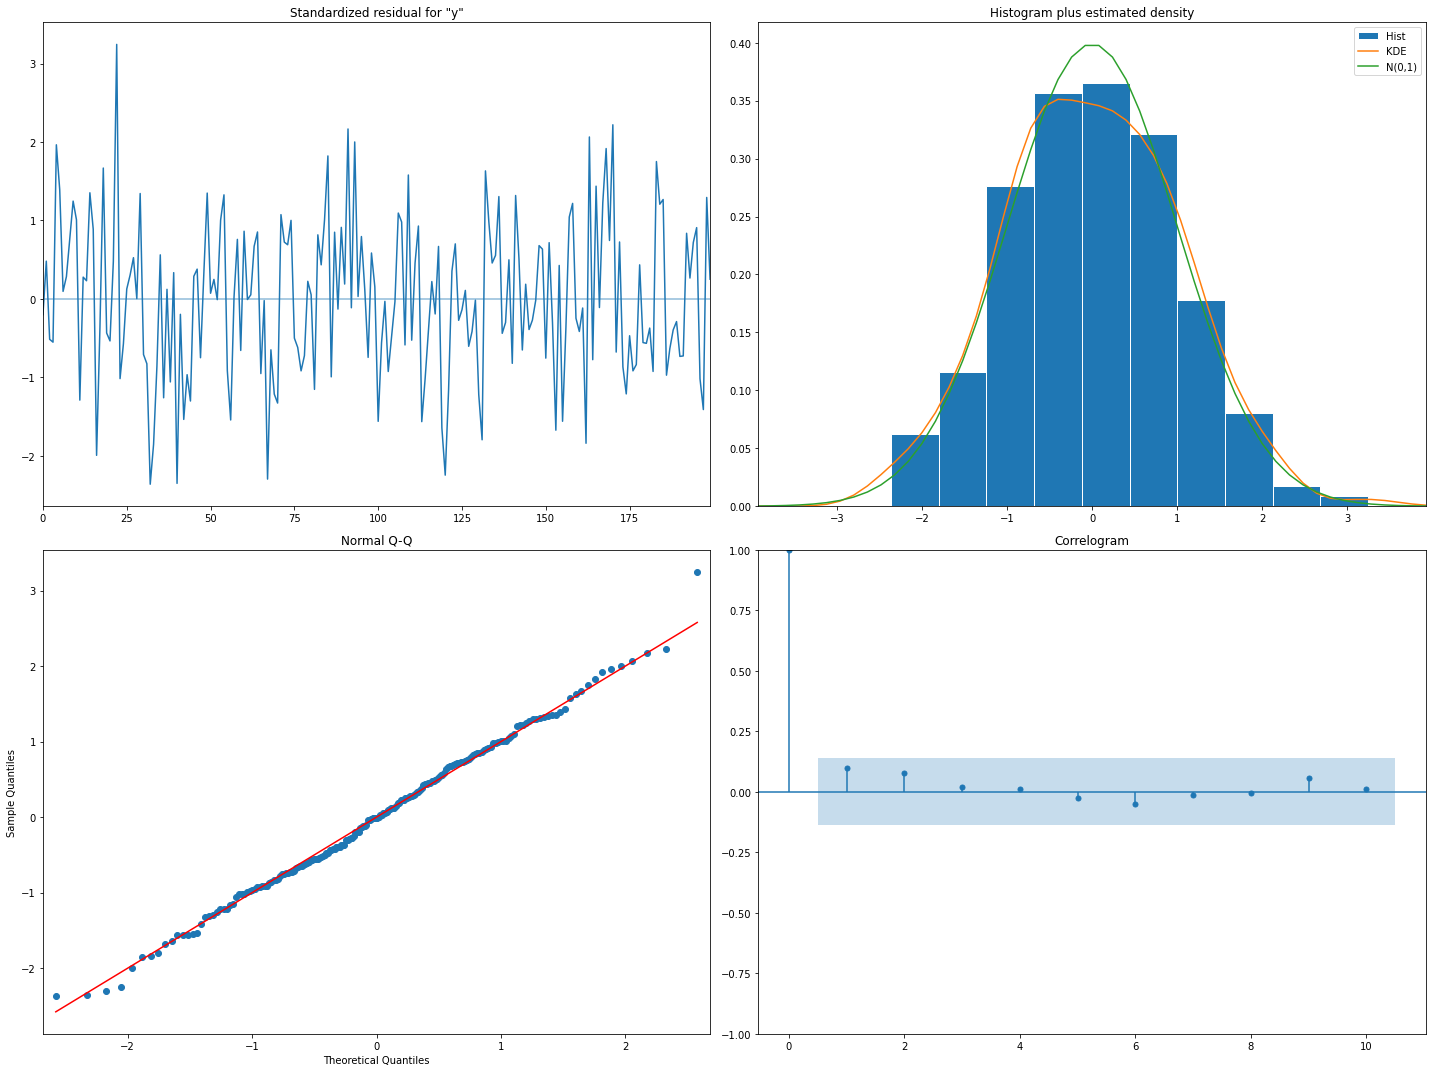

In [ ]:
res_trnd.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

In [ ]:
mod_rw = sm.tsa.statespace.SARIMAX(rw, trend='ct', order=(0,0,0))
res_rw = mod_rw.fit(disp = False)
print(res_rw.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                        SARIMAX   Log Likelihood                -525.731
Date:                Wed, 29 Mar 2023   AIC                           1057.462
Time:                        11:12:17   BIC                           1067.357
Sample:                             0   HQIC                          1061.467
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4830      0.433      5.730      0.000       1.634       3.332
drift          0.0251      0.005      5.329      0.000       0.016       0.034
sigma2        11.2447      1.389      8.096      0.0

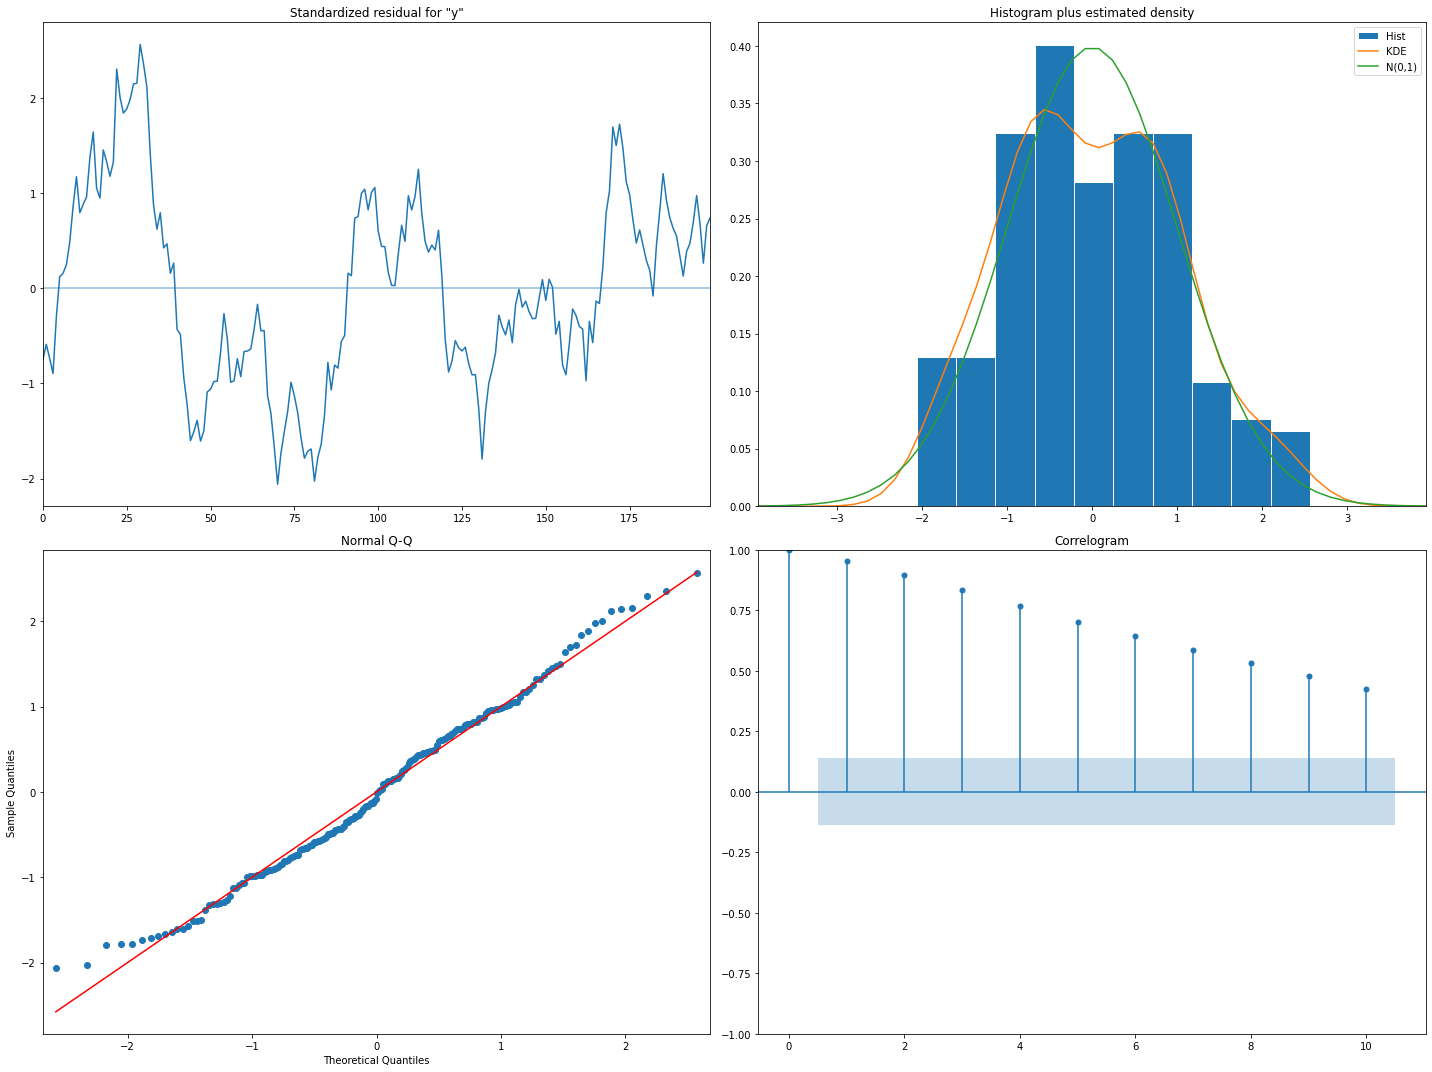

In [ ]:
res_rw.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

Произведите очистку от тренда переходом к рядам разностей  ΔXt   и  ΔWt 

In [ ]:
mod_trnd = sm.tsa.statespace.SARIMAX(trnd, trend='ct', order=(0,1,1))
res_trnd = mod_trnd.fit(disp = False)
print(res_trnd.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -294.803
Date:                Wed, 29 Mar 2023   AIC                            597.606
Time:                        11:19:53   BIC                            610.779
Sample:                             0   HQIC                           602.937
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0328      0.045      0.737      0.461      -0.054       0.120
drift          0.0001      0.000      0.347      0.729      -0.001       0.001
ma.L1         -0.7042      0.064    -11.060      0.0

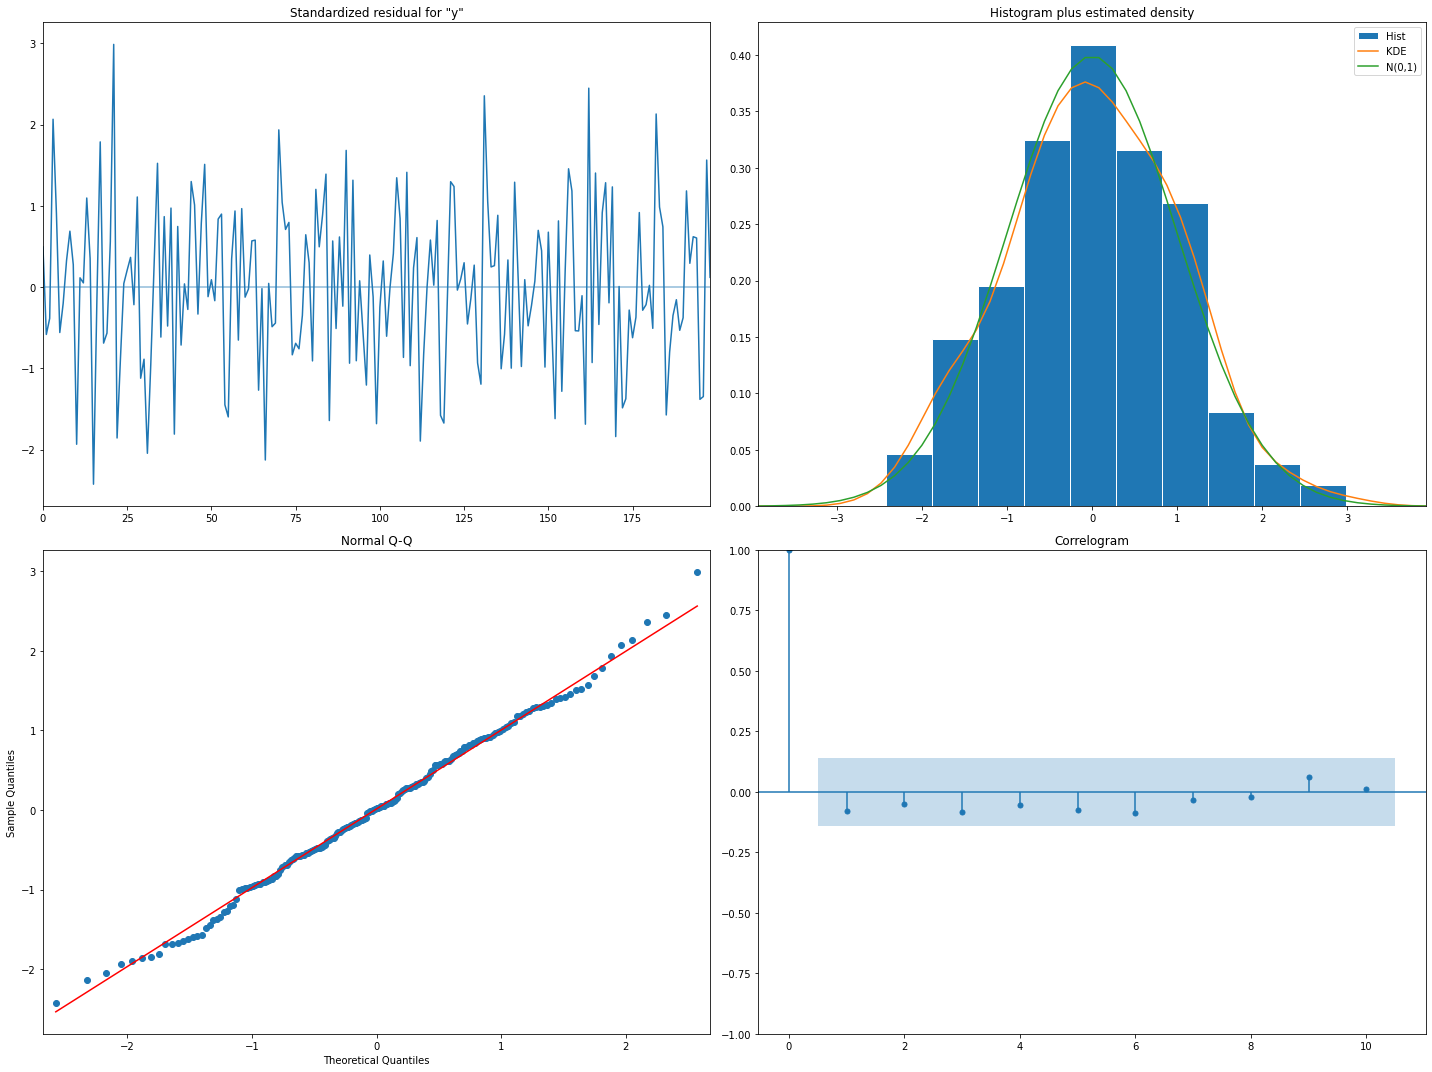

In [ ]:
res_trnd.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()

In [ ]:
mod_rw = sm.tsa.statespace.SARIMAX(rw, trend='ct', order=(0,1,0))
res_rw = mod_rw.fit(disp = False)
print(res_rw.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -283.195
Date:                Wed, 29 Mar 2023   AIC                            572.390
Time:                        11:21:31   BIC                            582.270
Sample:                             0   HQIC                           576.389
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0501      0.134      0.374      0.708      -0.213       0.313
drift      -8.071e-07      0.001     -0.001      0.999      -0.002       0.002
sigma2         1.0083      0.105      9.617      0.0

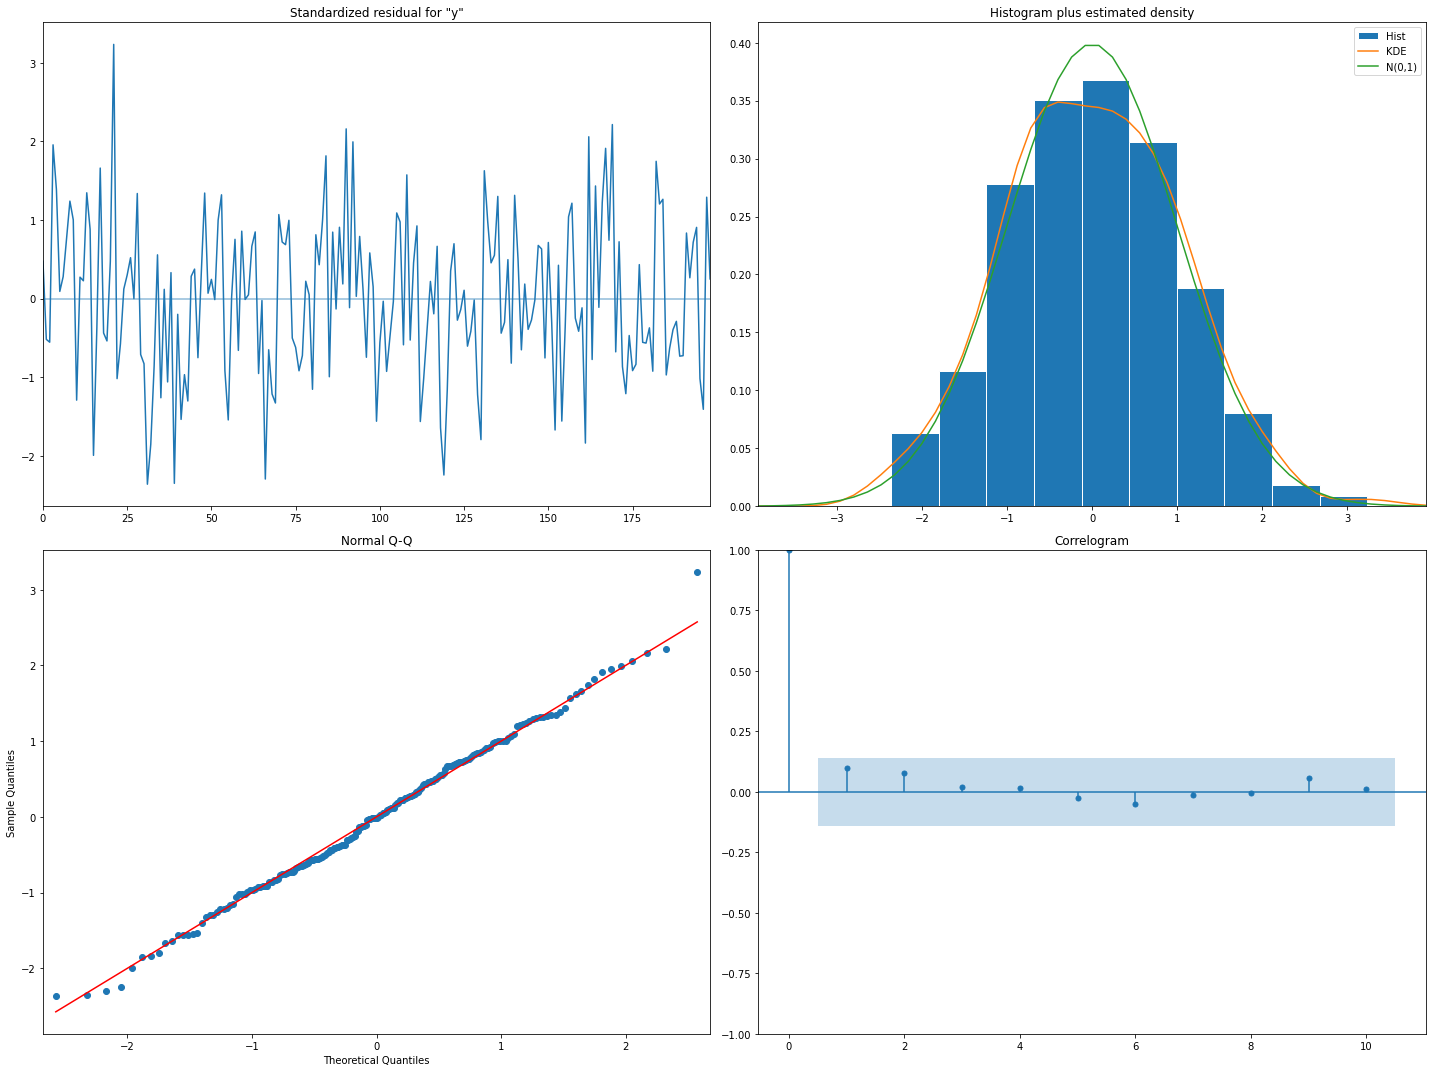

In [ ]:
res_rw.plot_diagnostics(figsize=(20, 15))
plt.tight_layout()